# Libraries installed

# Libraries used

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Download and load dataset

The following functions are used to allow users to add their own filepath or URL. Nevertheless, if you don't want to use them, in the next code cell you can find a preloaded file, ready to use.

In [2]:
def download_file(url, filename):
    """
    Download a file from the given URL and save it with the specified filename.

    Parameters:
    - url (str): The URL from which to download the file.
    - filename (str): The name to use when saving the downloaded file.

    Returns:
    None

    Raises:
    - FileNotFoundError: If the file specified by 'filename' is not found after attempting to download.
    - Exception: If an unexpected error occurs during the download process.
    """
    if not(os.path.isfile(filename)):
        print("Downloading file...")

        wget.download(url, filename)
        print(f"Current path: {os.getcwd()}")
        print("Files:")
        print(os.listdir())


def read_file() -> pd.DataFrame:
    """
    Prompt the user for a file path or URL, download the file if it's a URL, and read it into a Pandas DataFrame.

    Returns:
    pd.DataFrame: A DataFrame containing the data from the specified file.

    Raises:
    - pd.errors.ParserError: If there is an issue parsing the file (e.g., incorrect file format).
    - FileNotFoundError: If the specified file is not found.
    - Exception: If an unexpected error occurs during the file reading process.
    """
    while True:
        try:
            file_or_url = input("Enter the file path or URL: ")

            if file_or_url.startswith("http"):
                filename = file_or_url.split("/")[-1] + ".csv"
                download_file(file_or_url, filename)
                return pd.read_csv(filename)

            filename_lowercase = file_or_url.lower()

            if filename_lowercase.endswith('.csv'):
                return pd.read_csv(filename_lowercase)

            if filename_lowercase.endswith(('.xls', '.xlsx')):
                return pd.read_excel(filename_lowercase)

            if filename_lowercase.endswith('.json'):
                return pd.read_json(filename_lowercase)

            print("Unsupported file format. Please provide a CSV, Excel, or JSON file.")

        except pd.errors.ParserError:
            print("Error: Unable to parse the file. Please check the file format.")
        except FileNotFoundError:
            print("Error: File not found. Please enter a valid file path or URL.")
        except Exception as e:
            print(f"An error occurred: {e}")


#df = read_file()
#print(df)


Here is the preloaded file

In [3]:
df = pd.read_csv('../datasets/cleaned_data.csv')

print("\nHead:\n")
print(df.head())


Head:

             timestamp  age     sex relationship_status          occupation  \
0  2022-04-18 19:18:47   21    Male   In a relationship  University Student   
1  2022-04-18 19:19:28   21  Female              Single  University Student   
2  2022-04-18 19:25:59   21  Female              Single  University Student   
3  2022-04-18 19:29:43   21  Female              Single  University Student   
4  2022-04-18 19:33:31   21  Female              Single  University Student   

  affiliated_organization  social_media_user  \
0              University                  1   
1              University                  1   
2              University                  1   
3              University                  1   
4              University                  1   

                               common_platforms_used  avg_hours_spent_daily  \
0  ['Facebook', 'Twitter', 'Instagram', 'YouTube'...                      3   
1  ['Facebook', 'Twitter', 'Instagram', 'YouTube'...                  

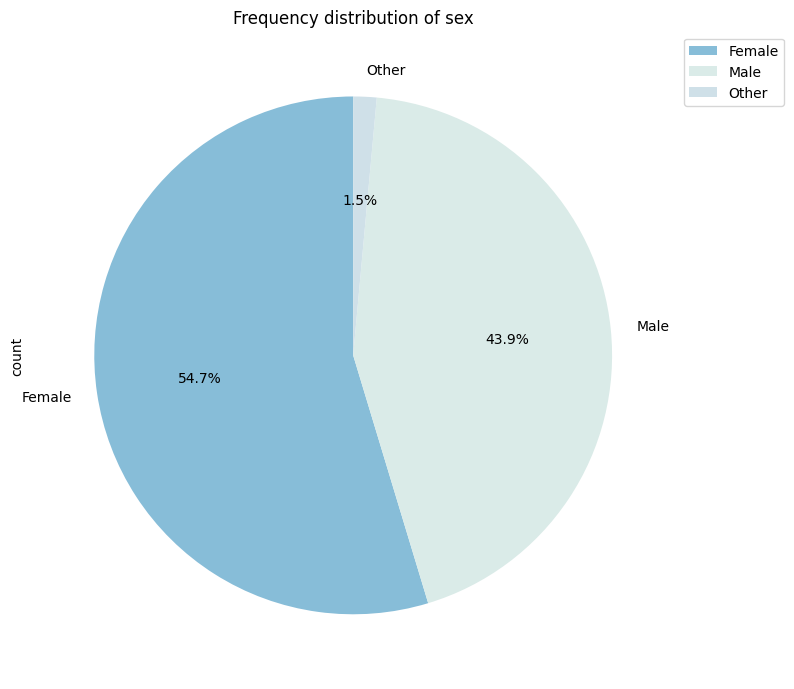

In [4]:
plt.figure(figsize=(8, 8))

colors = ['#87bdd8', '#daebe8', '#cfe0e8', '#ffa200']

df['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Frequency distribution of sex')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Move the legend outside of the pie chart

plt.rc('font', size=10) 

plt.tight_layout()
plt.show()